In [1]:
from left_turn_pedestrian.controller import sys_ctrl
import pickle
import hard_tests
import random
import visualization.animate as animate

import tulip as tlp
from tulip import transys, abstract, spec, synth
from IPython.display import HTML

import networkx as nx

import left_turn_pedestrian_tests

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/mathset.py:719: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/mathset.py:719: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1218: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1226: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1218: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/pyt

In [2]:
path = 'left_turn_pedestrian/'

# Organizing the Graph

In [3]:
# Load the graph from the saved file
with open(path + 'graph', "rb") as file:
    G = pickle.load(file)

In [4]:
# Load the system controller from the saved file
with open(path + "ctrl", "rb") as file:
    ctrl = pickle.load(file)

In [5]:
# Labeling the nodes like system nodes
for edge in ctrl.edges:
    for (key, val) in ctrl.edges[edge].items():
        ctrl.nodes[edge[1]][key] = val

In [6]:
# Conversions
light_conversion = ["g1", "g2", "g3", "y1", "y2", "r"] # TODO: Double check this conversion
loc_conversion = ['c4', 'c7', 'c8', 'c9']
for node in G.nodes:
    G.nodes[node]['loc'] = loc_conversion[G.nodes[node]['loc']]
    G.nodes[node]['light'] = light_conversion[G.nodes[node]['light']]

In [7]:
len(G.nodes)

834

In [8]:
# Removing nodes that violate the environment's safety
unsafe_env_nodes = set()
for node in G.nodes:
    if G.nodes[node]['light'] == 'r':
        if (G.nodes[node]['p'] == 4 or G.nodes[node]['vh'] == 4 
        or G.nodes[node]['p'] == 5 or G.nodes[node]['vh'] == 5):
            unsafe_env_nodes.add(node)
    if G.nodes[node]['light'] == 'y2':
        if G.nodes[node]['p'] == 4 or G.nodes[node]['vh'] == 4:
            unsafe_env_nodes.add(node)
G.remove_nodes_from(unsafe_env_nodes)

In [9]:
len(G.nodes)

658

In [10]:
# Relabeling the nodes in order
nodes = list(G.nodes)
new_labels = list(range(len(nodes)))
mapping = dict(zip(nodes, new_labels))
G = nx.relabel_nodes(G, mapping)

# Creating the Potential Hard Tests

## Memoryless Most Red

In [11]:
num_red_sys_metric = hard_tests.find_num_red_successors(G)

In [12]:
memoryless_most_red = hard_tests.memoryless_max_metric(G, num_red_sys_metric)

# Memoryless Percent Red

In [13]:
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)

In [14]:
memoryless_percent_red = hard_tests.memoryless_max_metric(G, percent_red_sys_metric)

In [15]:
memoryless_percent_red

{0: [1, 4, 7, 10],
 2: [653, 496],
 3: [520, 19, 605, 421],
 5: [248, 283, 496],
 6: [13, 262, 19, 421],
 8: [653, 496],
 9: [520, 19, 523, 22],
 11: [248, 252, 496],
 12: [13, 16, 19, 22],
 14: [292, 228, 281],
 15: [25, 73, 276, 234],
 17: [292, 228, 510],
 18: [25, 73, 28, 76],
 20: [292, 281, 497],
 21: [25, 276, 31, 427],
 23: [292, 510, 497],
 24: [25, 28, 31, 34],
 26: [226],
 27: [223],
 29: [221],
 30: [82],
 32: [480],
 33: [433],
 35: [517],
 36: [37],
 38: [],
 39: [40],
 41: [],
 42: [43, 46, 49, 52],
 44: [294, 504, 490],
 45: [55, 498, 409, 511],
 47: [294, 504, 296],
 48: [55, 498, 58, 501],
 50: [294, 490, 298],
 51: [55, 409, 4, 412],
 53: [294, 296, 298],
 54: [55, 58, 4, 10],
 56: [248, 250, 283],
 57: [13, 61, 262, 265],
 59: [248, 250, 252],
 60: [13, 61, 16, 64],
 62: [106, 228],
 63: [67, 154, 73, 234],
 65: [106, 228],
 66: [67, 70, 73, 76],
 68: [191],
 69: [160],
 71: [220],
 72: [79],
 74: [191, 226],
 75: [160, 223],
 77: [220, 221],
 78: [79, 82],
 80: [],

In [76]:
len(memoryless_percent_red)

348

In [80]:
sum = 0
for lst in memoryless_percent_red.values():
    sum += len(lst)
avg = sum / len(memoryless_percent_red)
print(avg)

1.9683908045977012


How many possible tests for maximizing the number of unsafe actions the system can take at the next timestep. This number was found by multiplying the number of equivalent transitions the environment can take at each state.

In [16]:
num_tests = 1
other_prod = 1
other_other_prod = 1
for val in memoryless_percent_red.values():
    if num_tests * len(val) != 0:
        num_tests *= len(val)
    elif other_prod * len(val) != 0:
        other_prod *= len(val)
    else:
        other_other_prod *= len(val)
print(num_tests, other_prod, other_prod)

1548620848130000524767764632836296566897420999429062118970376658266079548350611814218727424 1 1


The product of all the transitions the environment can take at each state

In [17]:
num_trajectories = 1
other_prod = 1
other_other_prod = 1
env_nodes = [node for node in G.nodes if 'oval' in G.nodes[node]['shape']]
for env_node in env_nodes:
    if num_trajectories * G.degree(env_node) != 0:
        num_trajectories *= G.degree(env_node)
    elif other_prod * G.degree(env_node) != 0:
        other_prod *= G.degree(env_node)
    else:
        other_other_prod *= G.degree(env_node)
print(num_trajectories, other_prod, other_prod)

82510189311587271550321771516564456630524805860574954300638357779747406427354829326728095115032650357610735562915840000000000000000000000000000000000000000000000000000000000000000000 1 1


The ratio of (the number of possible tests for maximizing the number of unsafe actions the system can take at the next timestep) to (the product of all the transitions the environment can take at each state)

In [18]:
1548620848130000524767764632836296566897420999429062118970376658266079548350611814218727424 / 82510189311587271550321771516564456630524805860574954300638357779747406427354829326728095115032650357610735562915840000000000000000000000000000000000000000000000000000000000000000000

1.8768843715554543e-92

The ratio of (the number of red nodes in G) to (the total number of nodes in G)

In [19]:
red_nodes = [node for node in G.nodes if 'color' in G.nodes[node] and G.nodes[node]['color'] == 'red']

In [20]:
len(red_nodes) / G.number_of_nodes()

0.0729483282674772

## Memoryless Min Robustness - Minimizing 

In [21]:
min_robustness_env_metric = hard_tests.find_min_robustness(G)

In [22]:
memoryless_min_rob_minimizing = hard_tests.memoryless_robustness_minimization(G, min_robustness_env_metric)

How many possible tests for minimizing robustness. This number was found by multiplying the number of equivalent transitions the environment can take at each state.

In [23]:
num_tests = 1
other_prod = 1
other_other_prod = 1
for val in memoryless_min_rob_minimizing.values():
    if num_tests * len(val) != 0:
        num_tests *= len(val)
    elif other_prod * len(val) != 0:
        other_prod *= len(val)
    else:
        other_other_prod *= len(val)
print(num_tests, other_prod, other_prod)

1 1 1


In [24]:
memoryless_min_rob_minimizing

{0: [10],
 2: [486],
 3: [421],
 5: [486],
 6: [421],
 8: [519],
 9: [22],
 11: [519],
 12: [22],
 14: [242],
 15: [234],
 17: [230],
 18: [76],
 20: [483],
 21: [427],
 23: [518],
 24: [34],
 26: [226],
 27: [223],
 29: [221],
 30: [82],
 32: [480],
 33: [433],
 35: [517],
 36: [37],
 38: [37],
 39: [40],
 41: [40],
 42: [52],
 44: [514],
 45: [511],
 47: [506],
 48: [501],
 50: [492],
 51: [412],
 53: [300],
 54: [10],
 56: [285],
 57: [265],
 59: [254],
 60: [64],
 62: [242],
 63: [234],
 65: [230],
 66: [76],
 68: [191],
 69: [160],
 71: [220],
 72: [79],
 74: [226],
 75: [223],
 77: [221],
 78: [82],
 80: [82],
 81: [85],
 83: [85],
 84: [85],
 86: [85],
 87: [91],
 89: [217],
 90: [214],
 92: [210],
 93: [97],
 95: [205],
 96: [202],
 98: [198],
 99: [103],
 101: [193],
 102: [154],
 104: [108],
 105: [70],
 107: [70],
 109: [110],
 111: [133],
 112: [113],
 114: [118],
 115: [118],
 117: [152],
 119: [122],
 121: [150],
 123: [126],
 125: [148],
 127: [130],
 129: [134],
 131: [

In [25]:
robust_exists = True
for key, val in memoryless_min_rob_minimizing.items():
    if val[0] not in memoryless_percent_red[key]:
        robust_exists = False
        print(val[0], memoryless_percent_red[key])
print(robust_exists)

486 [653, 496]
486 [248, 283, 496]
519 [653, 496]
519 [248, 252, 496]
242 [292, 228, 281]
230 [292, 228, 510]
483 [292, 281, 497]
518 [292, 510, 497]
37 []
40 []
514 [294, 504, 490]
506 [294, 504, 296]
492 [294, 490, 298]
300 [294, 296, 298]
285 [248, 250, 283]
254 [248, 250, 252]
242 [106, 228]
230 [106, 228]
82 []
85 []
85 []
217 [208]
210 [208]
205 [196]
198 [196]
193 [106]
108 [106]
70 []
118 []
160 []
163 []
163 []
180 []
195 []
201 [200]
207 []
213 [212]
113 []
180 []
223 []
136 []
136 []
136 []
258 [200, 256]
242 [279, 281]
223 []
223 []
223 []
261 []
261 []
261 []
261 []
309 [306]
384 []
320 [312, 314, 317]
260 []
355 []
335 []
285 [451, 283]
486 [451, 283]
271 [279]
482 [279]
483 [279, 281]
433 []
436 []
436 []
476 [467]
469 [467]
465 [451]
453 [451]
418 []
456 [455]
460 []
287 []
472 [471]
489 [455, 488]
489 []
495 [471, 494]
285 [196, 250]
254 [196, 250]
64 []
509 [212, 508]
483 [654, 497]
518 [654, 497]
37 []
40 []
492 [543, 298]
300 [543, 298]
300 []
309 [547, 306]
384 []


In [70]:
memoryless_min_rob_minimizing[0]

[10]

In [73]:
list(G.successors(10))

[11, 12]

In [74]:
memoryless_min_rob_minimizing[11]

[519]

In [75]:
memoryless_min_rob_minimizing[12]

[22]

In [ ]:
def finding_num_tests(G, transitions, init):
    curr = init
    env_actions = transitions[curr]
    

## Memoryless Average Robustness - Minimizing

In [82]:
min_robustness_env_metric

{0: 2,
 2: 1,
 3: 2,
 5: 1,
 6: 2,
 8: 1,
 9: 2,
 11: 1,
 12: 2,
 14: 1,
 15: 2,
 17: 1,
 18: 2,
 20: 1,
 21: 2,
 23: 1,
 24: 2,
 26: 1,
 27: 1,
 29: 1,
 30: 1,
 32: 1,
 33: 1,
 35: 1,
 36: 1,
 39: 1,
 42: 2,
 44: 1,
 45: 2,
 47: 1,
 48: 2,
 50: 1,
 51: 2,
 53: 1,
 54: 2,
 56: 1,
 57: 2,
 59: 1,
 60: 2,
 62: 1,
 63: 2,
 65: 1,
 66: 2,
 68: 1,
 69: 1,
 71: 1,
 72: 1,
 74: 1,
 75: 1,
 77: 1,
 78: 1,
 81: 1,
 84: 1,
 87: 2,
 89: 1,
 90: 2,
 92: 1,
 93: 2,
 95: 1,
 96: 2,
 98: 1,
 99: 2,
 101: 1,
 102: 2,
 104: 1,
 105: 2,
 109: 2,
 111: 659,
 112: 1,
 114: 659,
 117: 659,
 119: 659,
 121: 659,
 123: 659,
 125: 659,
 127: 659,
 129: 659,
 131: 659,
 135: 659,
 137: 659,
 139: 659,
 141: 659,
 143: 659,
 145: 659,
 147: 659,
 149: 659,
 151: 659,
 153: 659,
 155: 1,
 156: 1,
 159: 1,
 162: 1,
 165: 5,
 167: 5,
 168: 4,
 170: 3,
 171: 3,
 173: 2,
 174: 2,
 176: 1,
 177: 1,
 179: 1,
 183: 2,
 186: 3,
 189: 4,
 192: 1,
 194: 2,
 199: 1,
 203: 2,
 204: 2,
 206: 3,
 211: 1,
 215: 3,
 216: 3,
 21

In [81]:
avg_robustness_env_metric

{0: 4.75,
 2: 0.875,
 3: 1.5416666666666667,
 5: 0.8125,
 6: 1.1875,
 8: 1.3125,
 9: 5.0,
 11: 1.1666666666666667,
 12: 3.6666666666666665,
 14: 0.2916666666666667,
 15: 0.2916666666666667,
 17: 0.3541666666666667,
 18: 0.9583333333333334,
 20: 0.3541666666666667,
 21: 0.9583333333333334,
 23: 0.4791666666666667,
 24: 4.125,
 26: 0.0625,
 27: 0.375,
 29: 0.0625,
 30: 1.3125,
 32: 0.0625,
 33: 1.3125,
 35: 0.0625,
 36: 4.833333333333333,
 38: 0,
 39: 4.166666666666667,
 41: 0,
 42: 3.5,
 44: 1.0208333333333333,
 45: 1.0625,
 47: 1.3541666666666667,
 48: 1.6458333333333333,
 50: 1.3541666666666667,
 51: 1.6458333333333333,
 53: 1.875,
 54: 3.5833333333333335,
 56: 0.6041666666666666,
 57: 0.625,
 59: 0.8125,
 60: 1.1875,
 62: 0.2708333333333333,
 63: 0.2916666666666667,
 65: 0.3333333333333333,
 66: 0.9583333333333334,
 68: 0.0625,
 69: 0.375,
 71: 0.0625,
 72: 1.1666666666666667,
 74: 0.08333333333333333,
 75: 0.3958333333333333,
 77: 0.08333333333333333,
 78: 1.1875,
 80: 0,
 81: 1.083

In [26]:
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)

In [27]:
memoryless_avg_rob_minimizing = hard_tests.memoryless_robustness_minimization(G, avg_robustness_env_metric)

## Memoryless Min Robustness - Averaging

In [28]:
min_robustness_env_metric = hard_tests.find_min_robustness(G)

In [29]:
memoryless_min_rob_averaging = hard_tests.memoryless_robustness_averaging(G, min_robustness_env_metric)

## Memoryless Average Robustness - Averaging

In [30]:
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)

In [31]:
memoryless_avg_rob_averaging = hard_tests.memoryless_robustness_averaging(G, avg_robustness_env_metric)

# Comparing Tests

In [32]:
memoryless_most_red == memoryless_percent_red

True

In [33]:
memoryless_avg_rob_minimizing == memoryless_min_rob_minimizing

True

In [34]:
memoryless_avg_rob_averaging == memoryless_min_rob_averaging

True

In [35]:
memoryless_min_rob_minimizing == memoryless_min_rob_averaging

True

In [36]:
memoryless_avg_rob_minimizing == memoryless_avg_rob_averaging

True

So all of the robustness tests are the same

In [37]:
memoryless_most_red == memoryless_avg_rob_minimizing

False

But the counting neighbors tests are not the same as the memoryless tests

# Robustness Calculations

## Robust Test

MovieWriter ffmpeg unavailable; using Pillow instead.


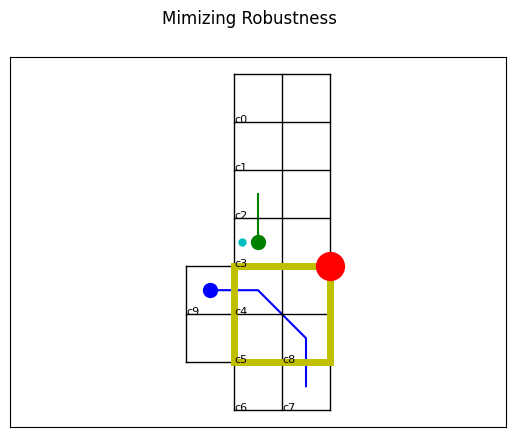

In [38]:
title = "Mimizing Robustness"
min_robustness_env_metric = hard_tests.find_min_robustness(G)
vh_signal, p_signal, light_signal, trajectory = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_minimization, min_robustness_env_metric, 30)
left_turn_pedestrian_tests.animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [39]:
def avg_robustness_over_trajectory(trajectory):
    min_robustness_env_metric = hard_tests.find_min_robustness(G)
    sum = 0
    for env_node in trajectory:
        sum += min_robustness_env_metric[env_node]
    return sum / len(trajectory)


In [40]:
def min_robustness_over_trajectory(trajectory):
    min_robustness_env_metric = hard_tests.find_min_robustness(G)
    min = min_robustness_env_metric[trajectory[0]]
    for env_node in trajectory:
        if min > min_robustness_env_metric[env_node]:
            min = min_robustness_env_metric[env_node]
    return min

In [41]:
avg_robustness_over_trajectory(trajectory)

110.83333333333333

In [42]:
min_robustness_over_trajectory(trajectory)

1

In [63]:
trajectory

[0, 11, 23, 35, 325, 327]

## Random Percent Red 1

MovieWriter ffmpeg unavailable; using Pillow instead.


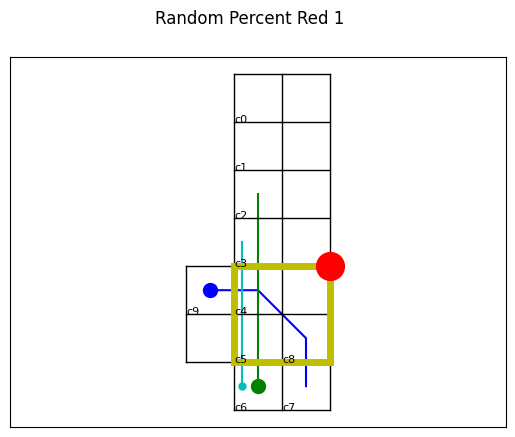

In [43]:
title = "Random Percent Red 1"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
vh_signal, p_signal, light_signal, trajectory1 = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
left_turn_pedestrian_tests.animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [44]:
avg_robustness_over_trajectory(trajectory1)

110.83333333333333

In [45]:
min_robustness_over_trajectory(trajectory1)

1

In [62]:
trajectory1

[0, 2, 20, 26, 227, 137]

## Random Percent Red 2

MovieWriter ffmpeg unavailable; using Pillow instead.


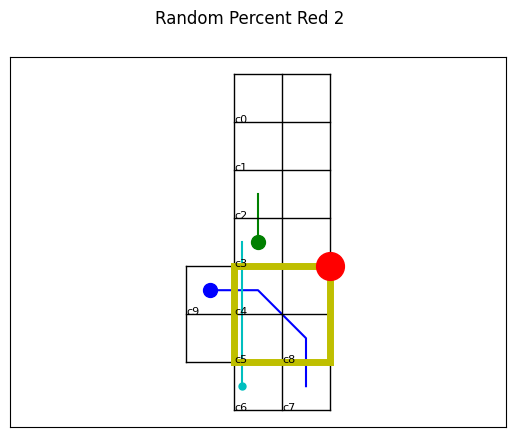

In [46]:
title = "Random Percent Red 2"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
vh_signal, p_signal, light_signal, trajectory2 = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
left_turn_pedestrian_tests.animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [47]:
avg_robustness_over_trajectory(trajectory2)

110.83333333333333

In [48]:
min_robustness_over_trajectory(trajectory2)

1

In [61]:
trajectory2

[0, 8, 521, 527, 481, 358]

## Random Percent Red 3

MovieWriter ffmpeg unavailable; using Pillow instead.


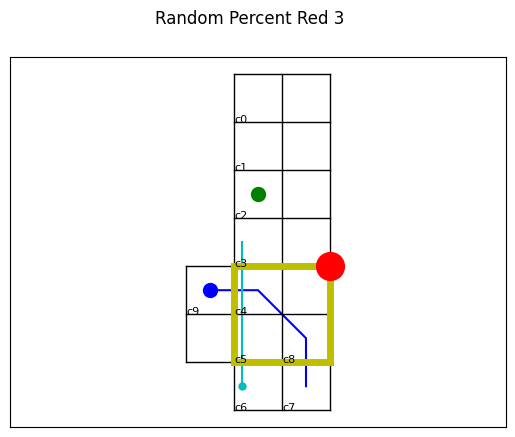

In [49]:
title = "Random Percent Red 3"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
vh_signal, p_signal, light_signal, trajectory3 = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
left_turn_pedestrian_tests.animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [50]:
avg_robustness_over_trajectory(trajectory3)

110.83333333333333

In [51]:
min_robustness_over_trajectory(trajectory3)

1

In [60]:
trajectory3

[0, 8, 521, 527, 642, 582]

## Random Percent Red 4

MovieWriter ffmpeg unavailable; using Pillow instead.


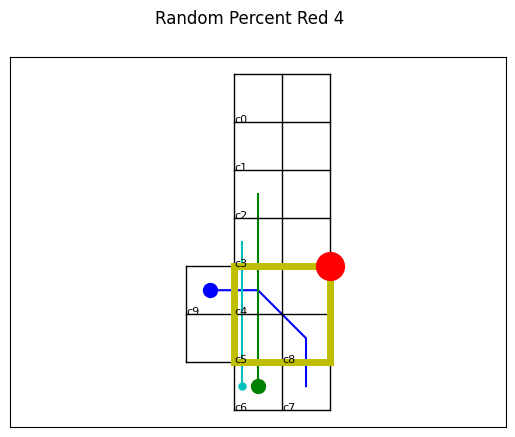

In [52]:
title = "Random Percent Red 4"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
vh_signal, p_signal, light_signal, trajectory4 = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
left_turn_pedestrian_tests.animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [53]:
avg_robustness_over_trajectory(trajectory4)

110.83333333333333

In [54]:
min_robustness_over_trajectory(trajectory4)

1

In [59]:
trajectory4

[0, 2, 20, 277, 241, 137]

## Random Percent Red 5

MovieWriter ffmpeg unavailable; using Pillow instead.


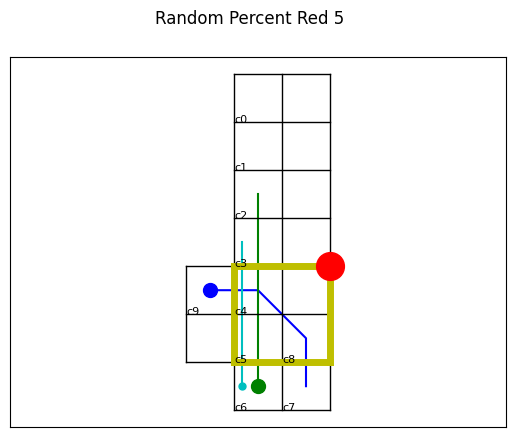

In [55]:
title = "Random Percent Red 5"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
vh_signal, p_signal, light_signal, trajectory5 = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
left_turn_pedestrian_tests.animate_test(ctrl, vh_signal, p_signal, light_signal, title)

In [56]:
avg_robustness_over_trajectory(trajectory5)

110.83333333333333

In [57]:
min_robustness_over_trajectory(trajectory5)

1

In [58]:
trajectory5

[0, 11, 17, 26, 227, 137]

## Doing Many Runs to See if I Get a Different Robustness

In [68]:
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
vh_signal, p_signal, light_signal, trajectory = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
iterations = 0
while abs(avg_robustness_over_trajectory(trajectory) - 110.83333333333333) < 1 and min_robustness_over_trajectory(trajectory) == 1:
    iterations += 1
    vh_signal, p_signal, light_signal, trajectory = left_turn_pedestrian_tests.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)


KeyboardInterrupt: 

In [69]:
iterations

16085561

maybe alter runner blocker